# Logistic Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# Importing the dataset
df = pd.read_csv('invest_prep_logist.csv', sep=';')
df.head(20)

,country,is_urban,age,female,married,religion,can_calc_percents,employment_type_last_year,income_government_last_year,income_own_business_last_year,...,active_bank_user,cash_property_savings,has_insurance,can_call,can_make_transaction,phone_ownership,num_financial_activities_last_year,literacy,has_investment,formal_savings (Y)
0,0,0,57,1,1,1,1,0,1,0,...,0,0,0,1,1,2,0,1,0,0
1,1,0,40,0,1,2,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
2,2,0,35,1,1,0,0,1,0,0,...,0,1,0,1,0,2,2,0,0,0
3,2,1,19,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,3,0,61,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3,1,16,1,0,0,0,1,1,0,...,0,0,0,1,1,1,0,1,0,0
6,0,0,40,0,1,0,0,2,0,0,...,0,1,0,0,0,0,0,0,1,0
7,1,0,27,1,1,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8,3,1,35,0,1,0,1,0,0,0,...,1,1,0,1,1,2,2,1,1,1
9,4,0,72,1,0,1,0,2,0,0,...,0,0,0,0,0,2,4,0,0,1


Загружен датасет, который был ранее обработан. Однако, добавлена переменная, которая была удалена для построения регрессий. Поскольку, там была поставлена другая задача - предиктор formal_savings сильно коррелировал с зависимой переменной У (на тот момент - сountry). Итак, зависимая переменая в моделе классификации  formal_savings - показывает есть ли у человека возможность сберегать средства и вкладывать их куда-то или все полученные деньги уходят на проживание и личные нужды - исходя из предоставленных социально-экономических факторов. Для дальнейшей корректной работы переменные были закодированы вручную (1 - True, 0 - False). 

Итак, цель классификации - отобрать к какому классу относится человек (1 - есть сбережения, 0 - трата всех средств) на основе присутствующих в моделе метрик. И понять корректно ли работают полученные модели и могут ли быть использованы для дальнейших задач классификации.

Cледует заметить, что модель логистической регрессии будет выступать базовой. На ее основе отберем значимые для моделирования переменнные и отталкиваясь от которой будет принято решение об целесообразности более сложных классификаторов.

Посмотрим далее нет ли в моделе сильно коррелируемых переменных теперь.

Поговорим о практическом применении модели классификации и зачем собственно нужно проводить данное исследование.
Исходя из первоначальной задачи, где мы искали модель с лучшим качеством распознаваемости обьектов, я пересмотрел поставленную цель и понял, что целесообразно искать ту модель, которая будет лучшим образом выявлять бедных людей. Поскольку даннй индекс расчитан на то, чтобы помогать в борьбе с бедностью, голодом, различной социальной помощью - ориентир делается именно на этот класс. Поэтому в последующих моделях будет делаться акцент именно на верном распознавании бедности. 
Исходя из вышесказанного нет смысла проводить балансировку данных (строить различные sampling модели), поскольку на гистограмме ниже видно, что выборка содержит в себе большее число именно бедного населения -  примерно в соотношении 1 к 3, а после балансировки увеличится число богатых, что никак не повлияет на поставленную задачу. 

<AxesSubplot:title={'center':'Savings'}>

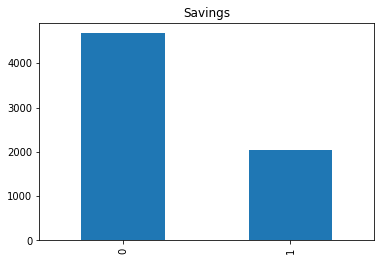

In [20]:
train['formal_savings (Y)'].value_counts().plot(kind='bar',title = 'Savings')

In [3]:
df.shape

(8400, 21)

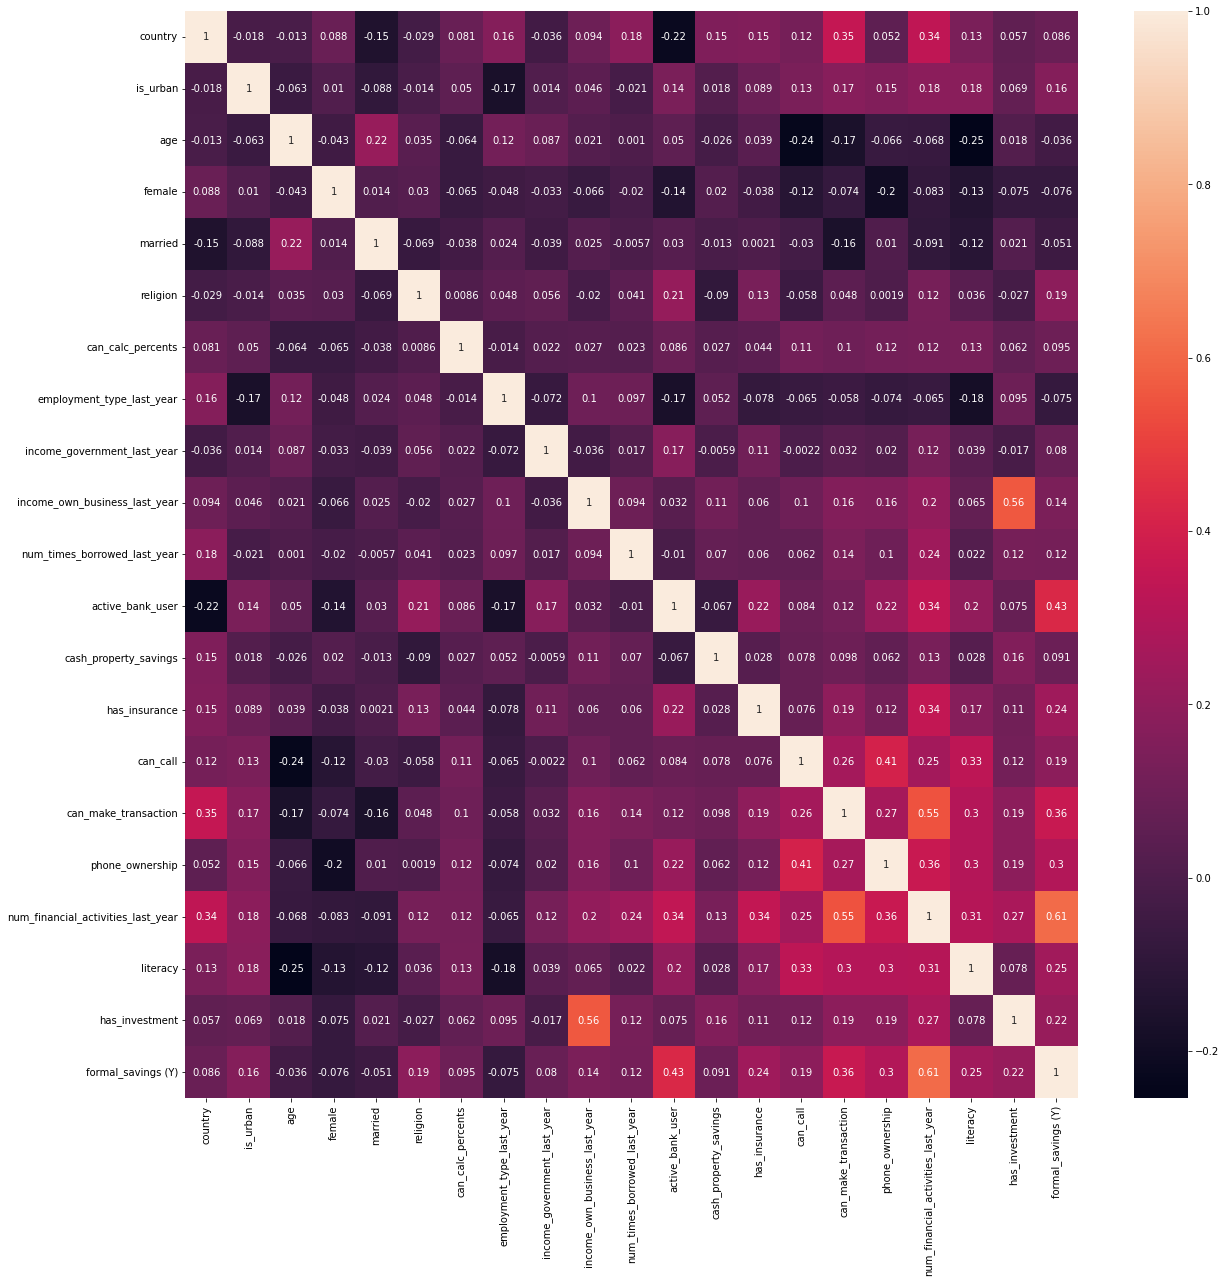

In [4]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

In [5]:
# Removing Correlated Data
dfr = df.drop(['can_make_transaction','has_investment'], axis='columns', inplace=False)
df = dfr
df.shape

(8400, 19)

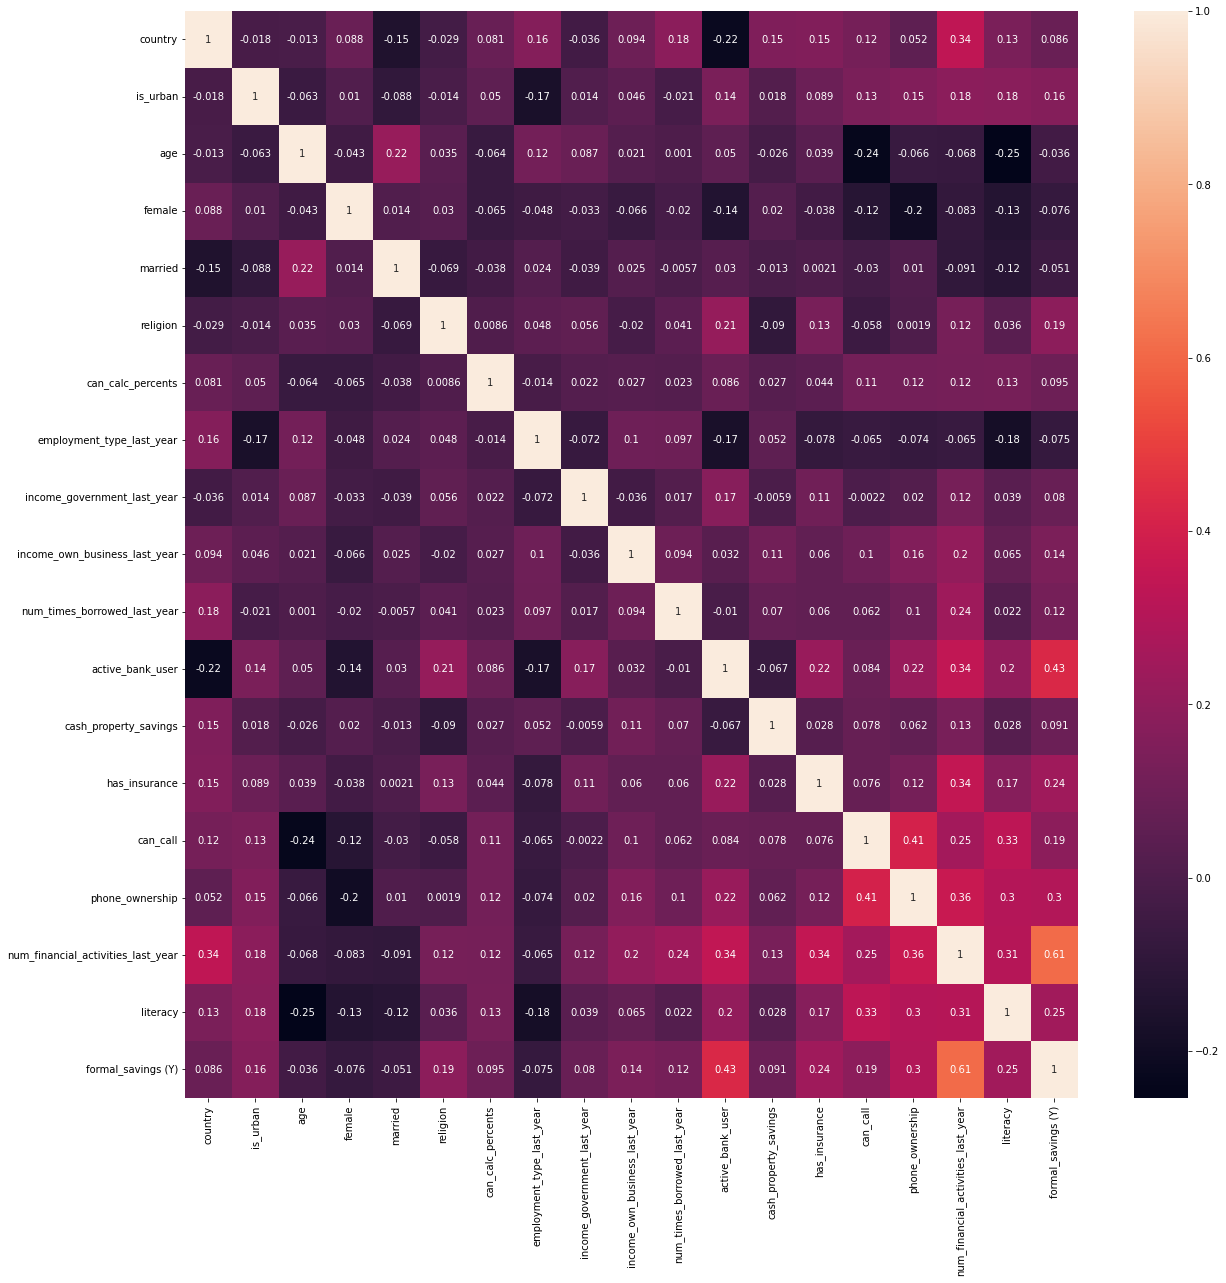

In [6]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

Из модели убраны сильно коррелируемые переменные. Так же можно заметить, что наиболее влиятельный фактор на У - num_financial_activities_last_year. Логично предположить, что чем больше финансовой активности у человек, тем большими средствами он распологает и соответственно выше шанс иметь сбережения.

In [7]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [8]:
df.dtypes

country                               int64
is_urban                              int64
age                                   int64
female                                int64
married                               int64
religion                              int64
can_calc_percents                     int64
employment_type_last_year             int64
income_government_last_year           int64
income_own_business_last_year         int64
num_times_borrowed_last_year          int64
active_bank_user                      int64
cash_property_savings                 int64
has_insurance                         int64
can_call                              int64
phone_ownership                       int64
num_financial_activities_last_year    int64
literacy                              int64
formal_savings (Y)                    int64
dtype: object

Разделим датасет на множество обьяснемой переменной (formal_savings) и обьясняющих переменных.

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

Для корректной работы данные были отшкалированы.

# FEATURE SELECTION

In [10]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.447729
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.275    
Dependent Variable: y                AIC:              6053.4841
Date:               2021-12-11 20:32 BIC:              6176.1153
No. Observations:   6720             Log-Likelihood:   -3008.7  
Df Model:           17               LL-Null:          -4149.7  
Df Residuals:       6702             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1       -0.2658     0.0406   -6.5397   0.0000   -0.3455   -0.1862
x2        0.0922     0.0335    2.7512   0.0059    0.0265    0.1579
x3 

x1 - country, x2 - is_urban, x3 - age, x4 - female, x5 - married, x6 - religion, x7 - can_calc_percents, x8 - empoyment_type_last_year, x9 - income_government_last_year, x10 - income_own_business_last_year, x11 - num_times_borrowes_last_year, x12 - active_bank_user, x13 - cash_property_savings, x14 - has_insurance, x15 - can_call, x16 - phone_ownership, x17 - num_financial_activities_last_year, x18 - literacy.

Построена базовая модель, которая помогает отобрать значимые переменные. Но для более точного анализа воспользуемся автоматическим выбором переменных.

In [11]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

13
[ True  True  True False False  True False  True  True False False  True
  True  True  True  True  True  True]
[1 1 1 5 3 1 2 1 1 4 6 1 1 1 1 1 1 1]


Автоматический отбор показывает, что в моделе 13 значимых переменных. Итак, дальнейшая модель будет построена на них.

In [12]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[0, 1, 2, 5, 7, 8, 11, 12, 13, 14, 15, 16, 17]
№	Index	Feature
0	0	country
1	1	is_urban
2	2	age
3	5	religion
4	7	employment_type_last_year
5	8	income_government_last_year
6	11	active_bank_user
7	12	cash_property_savings
8	13	has_insurance
9	14	can_call
10	15	phone_ownership
11	16	num_financial_activities_last_year
12	17	literacy


Выведены наиболее значимые переменные.

Итак:
    
    1. Country - уровень социально-экономического положения человека варьируется в зависимости от страны. Однако, напомню, что данный опрос проходили люди с разных слоев населения, поэтому не факт, что в определенной стране будут люди, которые принадлежат только к одному классу.
    2. Is_urban - здесь уже ситуация проще. В основном, у жителей города больший заработок и соответственно больше шанс к сбережениям.
    3. Age - чем старше человек, тем больше вероятность на его финансовую самостоятельность и более престижную работу. Однако, это работает до определенного возраста. Вряд ли люди на пенсии смогут иметь сбережения.
    4. Religion - действительно интересно, как в зависимости от вероисповедания состоят дела в финансовом плане у человека. 
    Для более детального понимания предоставлю выписку из статьи:
    Однако зачастую верующие оказываются богаче неверующих - это подтвердил, в частности, опрос американского центра изучения общественного мнения Pew Research. Социологи опросили около 35 тыс. людей, исповедующих разные религии. Их средний годовой доход составил $30,5 тыс. Число богатых (годовой доход превышает $100 тыс.) оказалось больше всего среди последователей трех религий — иудаизма (44%), индуизма (36%) и православия (29%). Среди тех, кто не верит в Бога, доля богатых людей составила всего 21%.
    Поэтому интересно понять, так ли это на самом деле.
    5.employment_type_last_year - логично, что у безработного намного меньше шанс к сбережениям, в отличии от работающих людей (если, конечно, не присутствует пассивный доход).
    6. income_government_last_year - данный показатель характеризует то, что у человека есть помощь от государства. Соответственно в большинстве случаев это либо пенсия, либо какая-то соцподдержка, что указывает на малую вероятность высокого финансового положения.
    7. active_bank_user - активная использование услуг банка может быть расценено, как в хорошем плане (кредиты для расширения бизнеса, депозиты, открытие новых карточек и тд), так и в негативном плане (кредиты для существования). Однако, в целом, это положительный знак для факт сбережения средства.
    8. cash_property_savings - характерно для людей, которые 1) не тратят деньги на сьем квартиры 2) дополнительно получают прибыль от аренды имущества. Соответсвенно, у таких людей больший шанс иметь сбережения.
    9. has_insurance - страховка хороший показатель финансовой состоятельности человека. Как минимум в том, что есть обьекты страхования (машина, квартира..)
    10. phone_ownership - Логично, что если у человека больше одного телефона, то уровень достатка явно выше.
    11. num_financial_activities_last_year - от большего числа финансовый опираций - больше шанс на лучшее финансовое состояние.
    12. literacy - уровень грамотности в целом показывает на умственные способности человека и его умение применять это для получения дохода.

In [13]:
# Leaving only Selected Features
X_train_select=X_train[:, selected_columns]
X_test_select=X_test[:, selected_columns]

# Fitting LR

In [14]:
# p-value < 1% Features
X_train = X_train[:,[True, True, True, False, False, True, False, True, True, False, False, True, True, True, True, True, True, True]]
X_test = X_test[:,[True, True, True, False, False, True, False, True, True, False, False, True, True, True, True, True, True, True]]

Модель будет построена на 13 переменных, которые наиболее значимы по результатам исследования.

In [15]:
# Fitting Logistic Regression to the Training set 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [16]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.8559523809523809

Получено высокое качество модели. Почти 86% обьектов тестовой выборки распознаны верно.

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1095   97]
 [ 145  343]]


Построена таблица сопряженности на основе тестовой выборки. 1438 примеров распознаны верно, неверно распознано 242. Таким образом 145 обьектов модель отнесла неверно к классу False и, соответсвенно, 97 обьектов не правильно отнесены к классу True.

Итак, людей, которые действительно к концу года имеют сбережения, но модель их неправильно распознала - 145, а наоборот, у которых нет лишних средств, но отправились к классу состоятельных людей - таких 97.

Построена базовая модель, которую стоит сравнить со всеми последующими и выявить наилучший результат.

In [18]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_LogRegr.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()